In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from PIL import Image
import imageio
import os, os.path

In [22]:
defect_area = pd.read_csv('defect_area.csv')

In [23]:
defect_area.head()

,id,x_1,y_1,x_2,y_2
0,SOT23DUMMY01_04-APG_ITIS_H52_1_111_4,40,100,99,198
1,SOT23DUMMY01_09-APG_ITIS_H52_1_12_3,28,90,242,204
2,WEA938001D1A_17-APG_ITIS_H49_1_40_2,10,131,52,179
3,WEA938001D1A_48-APG_ITIS_H51_2_203_1,25,86,229,175
4,WEE939001B0A_14-APG_ITIS_H20_1_374_4,106,90,242,134


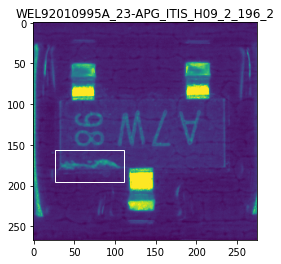

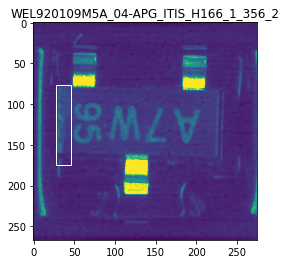

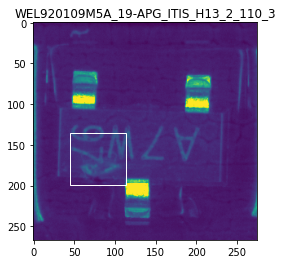

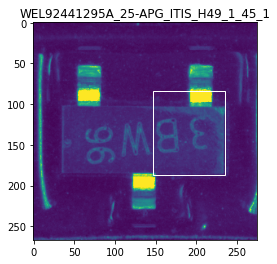

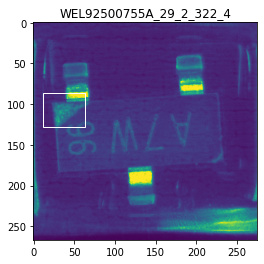

In [66]:
from PIL import Image
import imageio

for i in range(10,15):
    image_id = defect_area['id'][i]
    image_path = 'train/train_contest/defect/' + image_id +'.bmp'
    image = np.array(Image.open(image_path), dtype=np.uint8)
    width = defect_area['x_2'][i] - defect_area['x_1'][i]
    height = defect_area['y_2'][i] - defect_area['y_1'][i]

    fig, ax = plt.subplots(1)
    ax.imshow(image)
    rect = patches.Rectangle((defect_area['x_1'][i], defect_area['y_1'][i]), width=width, height=height, linewidth=1, edgecolor='white', fill=False)

    ax.add_patch(rect)

    plt.show
    plt.title(str(defect_area['id'][i]))

In [4]:
print(np.max(defeat_area['x_2']))
print(np.max(defeat_area['y_1']))

274
221


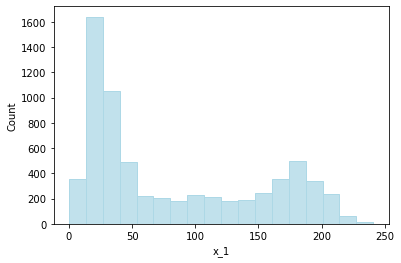

In [5]:
sns.histplot(data=defeat_area, x="x_1", color='#ADD8E6', edgecolor='#ADD8E6')

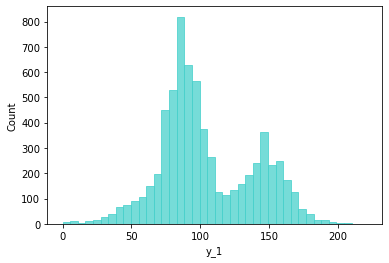

In [26]:
sns.histplot(data=defeat_area, x="y_1", color='#48D1CC', edgecolor='#48D1CC')

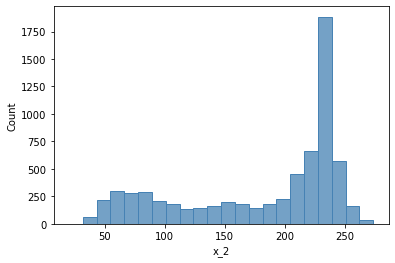

In [28]:
sns.histplot(data=defeat_area, x="x_2", color='#4682B4', edgecolor='#4682B4')

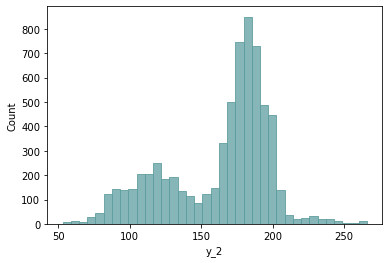

In [29]:
sns.histplot(data=defeat_area, x="y_2", color='#5F9EA0', edgecolor='#5F9EA0')

In [2]:
# simple version for working with CWD
# print (len([name for name in os.listdir('.') if os.path.isfile(name)]))

# path joining version for other paths
DIR = 'train/train_contest/defect'
defects = [name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]
print('Number of defect devices in training data: ', len(defects))

DIR = 'train/train_contest/good_all'
good = [name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]
print('Number of good devices in training data: ', len(good))


Number of defect devices in training data:  7039
Number of good devices in training data:  27420


In [52]:
good_mask = np.random.rand(len(good)) < 0.65
good = pd.DataFrame(good, columns=['id'])
good = good[good_mask]
print(len(good))

data_label = [0 for i in range(len(good['id']))] + [1 for i in range(len(defects))]
data_id = list(good['id']) + defects

17800


In [4]:
data_label = [0 for i in range(len(good))] + [1 for i in range(len(defects))]
data_id = good + defects

In [54]:
print(len(data_id))
print(len(data_label))

24839
24839


In [5]:
data_df = pd.DataFrame({'id':data_id, 'label':data_label})
data_df.head(-5)

,id,label
0,WEP93714414A_19-WDV-ITISA75-2_321_2.bmp,0
1,WEL93821755A_12-5CW-ITISA49-1_6_3.bmp,0
2,WEP937068H2A_14-5CW-ITISA46-2_367_4.bmp,0
3,WEL930041D5A_14-WV3-ITISA09-2_10_2.bmp,0
4,WEP93714414A_40-WDV-ITISA43-2_144_4.bmp,0
...,...,...
34449,WEP931117R3A_11-APG_ITIS_H49_1_93_4.bmp,1
34450,WEL93420866A_10-APG_ITIS_H09_2_64_3.bmp,1
34451,WEP93954013A_03-APG_ITIS_H54_2_515_3.bmp,1
34452,WEP93930851A_06-APG_ITIS_H115_2_1226_2.bmp,1


<AxesSubplot:title={'center':'Image Class Distribution'}>

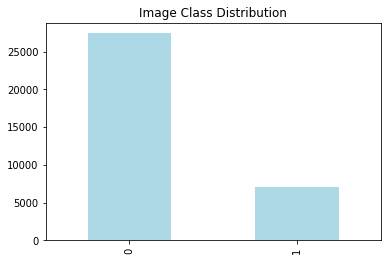

In [6]:
label_df = pd.DataFrame(data_label, columns=['label'])
label_df['label'].value_counts().plot(kind='bar', color='#ADD8E6', title='Image Class Distribution')

In [57]:
from sklearn.model_selection import train_test_split

train_ratio = 0.65
val_ratio = 0.35

x_train, x_val, y_train, y_val = train_test_split(data_id, data_label, train_size=train_ratio, test_size=val_ratio, random_state=4471, stratify=data_label)

pd.DataFrame({"id": x_train, "label": y_train}).to_csv("re_train_id_label.csv", index=False)

pd.DataFrame({"id": x_val, "label": y_val}).to_csv("re_val_id_label.csv", index=False)

In [58]:
train = pd.read_csv('re_train_id_label.csv')
val = pd.read_csv('re_val_id_label.csv')

<AxesSubplot:>

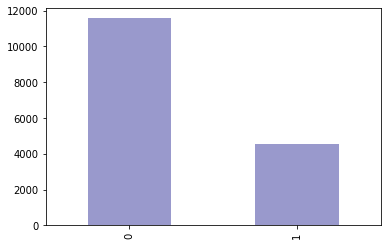

In [59]:
train['label'].value_counts().plot(kind='bar', color='#9999CC')

<AxesSubplot:>

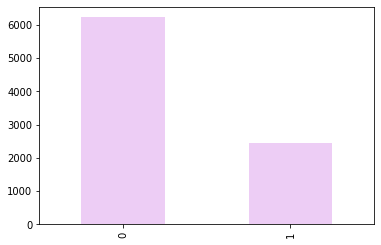

In [60]:
val['label'].value_counts().plot(kind='bar', color='#EDCDF5')

In [4]:
DIR = 'test/test_contest/test'
test = [name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]
print('Number of defect devices in testing data: ', len(test))

#pd.DataFrame({"id": test}).to_csv("test_id.csv", index=False)

Number of defect devices in testing data:  3830


In [ ]:
defect_id = []
for i in range(4):
    image_id = defects[i]
    image_path = 'train/train_contest/defect/' + image_id
    defect_id.append(image_id.replace('.bmp', ''))
    image = imageio.imread(image_path)

    plt.subplot(4, 1, i+1)
    plt.imshow(image.astype('uint8'))
    plt.gca().axis('off')
    plt.title(str(defect_id[i]))

In [61]:
test_id = pd.read_csv('test_resnet_score.csv')['id']

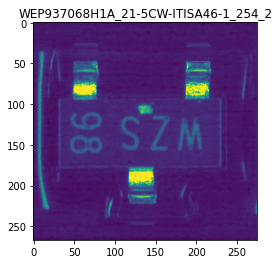

In [78]:
defect_id = []
for i in range(1):
    image_id = 'WEP93203361A_07-APG_ITIS_H35_2_1246_1'#test_id[i]
    image_path = 'test/test_contest/test/' + image_id +'.bmp'
    image = imageio.imread(image_path)

    plt.subplots(1)
    plt.imshow(image.astype('uint8'))
    plt.title(str(test_id[i]))